# Cálculo de potencial eléctrico por diferencias finitas hasta una determinada precisión (con controles interactivos)

Esta es una forma de resolver el potencial eléctrico por medio de diferencias finitas hasta una determinada precisión, incluyendo controles interactivos, para el caso de la placa cuadrada de lado L que se muestra seguidamente.

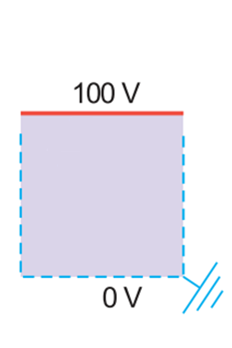

Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational Physics: Introductory Computational Science. Princeton: Princeton University Press.

# Bibliotecas necesarias

In [1]:
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

---
**Instrucción 1: les corresponde analizar el algoritmo dado en la sección "Función para calcular el potencial aproximado en cualquier punto (x, y) la placa", para entenderlo y posteriormente comentarlo de manera amplia, con el objetivo de que pueda ser trabajado con más facilidad por otras personas. Al menos deben incluir comentarios en las líneas en que se indica en dicho código.**
---

# Función para calcular el potencial aproximado en cualquier punto (x, y) la placa

In [2]:
# Se define la malla de puntos para evaluar el potencial eléctrico
puntosmalla = 30
x = np.linspace(0, 1, puntosmalla)
y = np.linspace(0, 1, puntosmalla)
X, Y = np.meshgrid(x, y)

# Se inicializa la matriz con los valores iniciaes del potencial en cada
# punto de la malla
uxyi = np.zeros((puntosmalla, puntosmalla), float)
uxy = np.ones((puntosmalla,puntosmalla),float)
# Se establecen las condiciones de frontera para el caso particular de la
# placa cuadrada
for i in range(puntosmalla):
    uxyi[puntosmalla-1,i] = 25

In [3]:
def AproxUXY(uxy, pm, prec):
    '''Calcula el valor aproximado del potencial eléctrico en el punto (x, y)
 
    Parámetros de la función
    ------------------------
    uxy : matriz con los valores iniciales del potencial electrico en cada
           punto de la malla
    pm : número de puntos de la malla
    prec : precisión requerida para el cálculo aproximado de los valores del
            potencial en la malla
 
    Salida de la función
    --------------------
    valorAproxUXY : matriz con los valores finales del potencial eléctrico
                    cada punto de la malla
    '''
    # Se define el contador de iteraciones
    contador_iteraciones = 0

    # Se define canasta_imprec para correr o deter el ciclo while a continuación
    canasta_imprec = 1

    # Se realiza el cálculo iterativo del potencial aproximado en cada punto
    # de la malla iniciando en la esquina superior izquierda de esta, hasta
    # que se alcanza la precisión requerida
    while canasta_imprec == 1:
        # Por cada corrida del While se toma como una iteración sobre toda la matriz
        contador_iteraciones += 1

        # Se cambia el valor de canasta_imprec a 0, la cantidad de iteraciones mínimas sería 1, según la precisión escogida o la cantidad de iteraciones
        canasta_imprec = 0
        uxy_anterior = deepcopy(uxy)
        for m in range(1, pm-1, 1):
            for n in range(1, pm-1, 1):
                # Se guarda la matriz anterior para calcular la diferencia entre la actual y la anterior
                #uxy_anterior = uxy[m, n]
                
                # Se aplica el método de Gauss-Siedel para esta EDP particular
                uxy[m, n] = 0.25*(uxy[m+1,n]+uxy[m-1,n]+uxy[m,n+1]+uxy[m,n-1])
                # Se calcula la diferencia entre el nuevo potencial y el anterior, para la primera iteración uxy_anterior es la matriz de calores iniciales
                dif = np.abs(uxy[m,n]-uxy_anterior[m,n])
                #print(uxy[m, n],dif)
                
                # Si no se cumple la precisión deseada, se debe hacer una nueva iteración por lo que a canasta_imprec se le
                # asigna el valor de 1, para que el while vuelva a correr
                if dif > prec:
                    canasta_imprec = 1

                # Si el contador de iteraciones supera 500, aún no se alcance la precisión deseada, se cdetiene el ciclo
                if contador_iteraciones > 500:
                    canasta_imprec = 0
        
    # Se retorna el valor obtenido del ciclo y la cantidad de iteraciones
    valorAproxUXY = uxy
    print("Cantidad iteraciones para alcanzar precisión: ", contador_iteraciones)
    print('Precisión lograda',dif)
    return valorAproxUXY

# Cálculo del potencial aproximado y montaje de la presentación gráfica

In [4]:
def Grafico_interactivo(lado, potencial, prec):
    '''
    Calcula el valor aproximado del potencial eléctrico en una malla de puntos
    y lo 

    Parámetros de la función
    ------------------------
    lado : arista de la placa cuadrada sujeta al potencial eléctrico
    potencial : valor del potencial eléctrico en el lado superior de la placa
    prec : precisión requerida para el cálculo aproximado de los valores del
            potencial en la malla

    Salida de la función
    --------------------
    Z : conjunto de valores del potencial aproximado en los puntos de la malla
    y gráfico 3D
    '''

    # Se define la malla de puntos para evaluar el potencial eléctrico
    puntosmalla = 30
    x = np.linspace(0, lado, puntosmalla)
    y = np.linspace(0, lado, puntosmalla)
    X, Y = np.meshgrid(x, y)

    # Se inicializa la matriz con los valores iniciaes del potencial en cada
    # punto de la malla
    uxyi = np.zeros((puntosmalla, puntosmalla), float)

    # Se establecen las condiciones de frontera para el caso particular de la
    # placa cuadrada
    for i in range(puntosmalla):
        uxyi[puntosmalla-1,i] = potencial

    # Se calcula el valor aproximado del potencial eléctrico en los puntos de
    # la malla y se asignan al eje Z
    Z = AproxUXY(uxyi, puntosmalla, prec/1000)

    plt.figure(figsize=(10,6))
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('U (V)')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='cividis', edgecolor='none')
    ax.set_title('Aproximacion potencial electrico en la placa')
    plt.show()

    return

# Interactividad con la presentación gráfica

In [5]:
y=interactive(Grafico_interactivo, {'manual': True}, lado=widgets.IntSlider(min=1.0, max=5.0, step=1.0, value=1.0, description='L (m):'),
              potencial=widgets.IntSlider(min=25.0, max=150.0, step=25.0, value=25.0, description='U0 (V):'),
              prec=widgets.IntSlider(min=1.0, max=1000.0, step=1.0, value=1000.0, description='Prec (mV):'))
display(y)

interactive(children=(IntSlider(value=1, description='L (m):', max=5, min=1), IntSlider(value=25, description=…

---
**Instrucción 2: describan al menos una forma adicional en que se podría haber preparado un código que llevara a una ejecución iteractiva hasta alcanzar una determinada precisión. Esta descripción es en prosa, sin escribir código como tal, pero pueden utilizar pseudocódigo como complemento si les parece necesario.**
---

En lugar de recorrer elemento por elemento, se podría almacenar una matriz que sea igual a la anterior, calcular los elementos para la nueva matriz, realizar una resta ambas y obtener la cantidad de elementos en los que esta diferencia es superior, en valor absoluto, a la precisión deseada, esto se puede realizar por medio de $\textrm{np.where}$, con la condición mencionada, esto permitiría acelerar el proceso de cálculo.